In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

def f(x):
    return 0.5*x + 7*x/(1 + 0.12*(x**2)) + 6*np.cos(x)

In [36]:
x_sample = np.linspace(-40, 40, 2001)
dx = 0.5*(x_sample[1] - x_sample[0])

In [37]:
def gaussian_integral(x, dx, mu, sigma):
    return scipy.stats.norm.cdf(x + dx, mu, sigma) - scipy.stats.norm.cdf(x - dx, mu, sigma)

In [38]:
P = np.stack([gaussian_integral(x_sample, dx, f(mu), 4) for mu in x_sample], axis=0)

In [39]:
def power_iteration(P, n_iter=100):
    x = np.random.rand(P.shape[0])
    x /= np.sum(x)
    for _ in range(n_iter):
        x = P.T @ x 
    return x

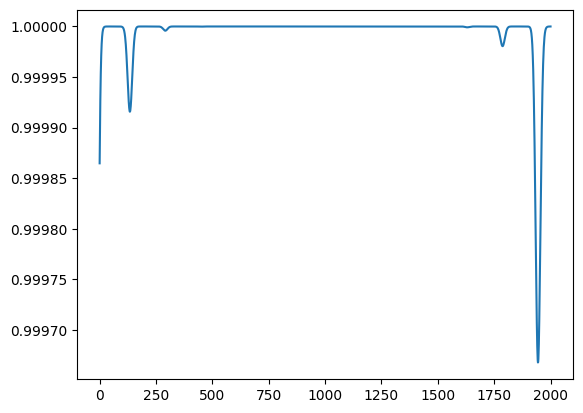

In [40]:
plt.plot(np.sum(P, axis=1))

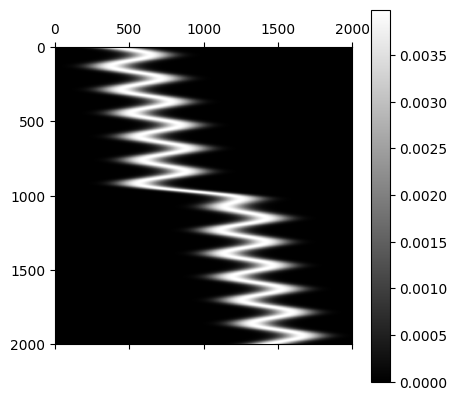

In [41]:
plt.matshow(P, cmap='gray')
plt.colorbar()

In [42]:
vals, lvecs, rvecs = scipy.linalg.eig(P.T, left=True, right=True)

In [43]:
sort_perm = np.argsort(np.abs(vals))[::-1]
vals = vals[sort_perm]
lvecs = lvecs[:, sort_perm]
rvecs = rvecs[:, sort_perm]

/home/novelli/anaconda3/envs/kooplearn_examples/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


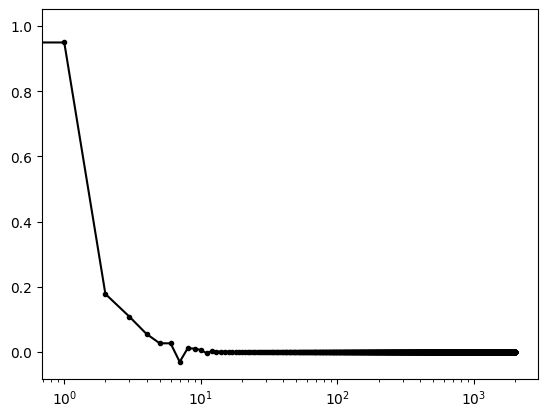

In [44]:
plt.plot(vals, 'k.-')
plt.xscale('log')

In [45]:
rvecs[:, 1]

array([ 4.91490906e-09+0.j,  5.16551884e-09+0.j,  5.42849690e-09+0.j, ...,
       -4.91353766e-09+0.j, -4.67579340e-09+0.j, -4.44921564e-09+0.j])

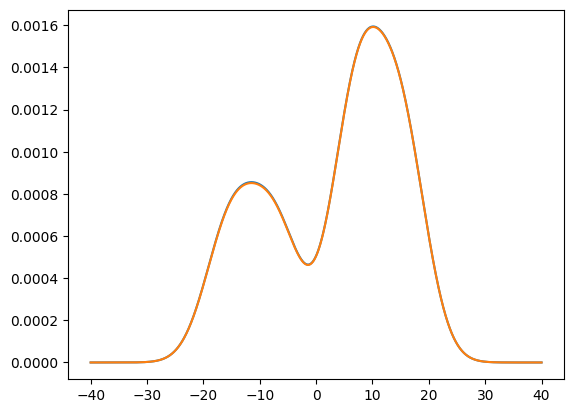

In [57]:
plt.plot(x_sample, power_iteration(P), label='real')
plt.plot(x_sample, 0.032*rvecs[: ,0].real, label='real')

In [64]:
pi = power_iteration(P)
scaled_P = P@np.diag(pi)

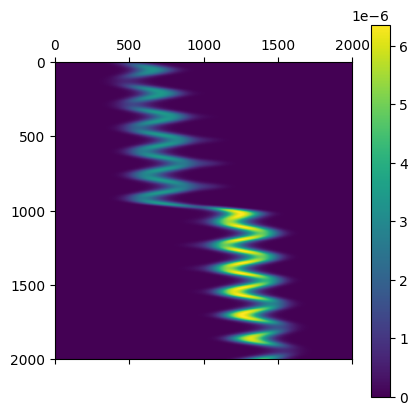

In [65]:
plt.matshow(scaled_P)
plt.colorbar()